# Initial testing of the `Polynomial` class

In [1]:
from py_files.poly_dictionary import decompose_polynomial
from py_files.Polynomial import *

In [2]:
poly7 = decompose_polynomial("2*x^2 - 3*x + 5")                                 # Uni-variate
poly8 = decompose_polynomial("-x^2 + 4*x - 7")                                  # Uni-variate
poly9 = decompose_polynomial("5*x^3 - 3*x^2 + 7*x - 10")                        # Uni-variate

In [3]:
poly10 = decompose_polynomial("2*x^2*y - 3*x*y^2 + 5*y")                        # Multivariate
poly11 = decompose_polynomial("-x^2*y^2 + 4*x*y - 7*z^3")                       # Multivariate
poly12 = decompose_polynomial("5*x^3*y^2*z - 3*x^2*y*z^2 + 7*x*y*z - 10*z^2")   # Multivariate

## `is_multivariate` functionality

In [4]:
p7 = UniPoly(poly7)
p8 = UniPoly(poly8)
p9 = UniPoly(poly9)

print(f"Bi-variate? {p7.is_bivariate}")
print(f"Tri-variate? {p7.is_trivariate}")

Bi-variate? False
Tri-variate? False


In [5]:
p10 = BiVarPoly(poly10)
p11 = TriVarPoly(poly11)
p12 = TriVarPoly(poly12)

p10.is_multivariate

True

In [6]:
print(p10.num_variables)

2


In [7]:
print(p11.num_variables)

3


----
&nbsp;
### Incorrect instances

# NEED ERROR for `BiVarPoly` and `TriVarPoly`

In [8]:
p_error = UniPoly(poly10)

ValueError: The provided expression does not represent a uni-variate polynomial.

In [9]:
p_error_two = TriVarPoly(poly9)

----
&nbsp;
## Testing `__add__()`, `__sub__()`, `__mul__()` and `__str__()`  methods

In [10]:
polynomials = [p10, p11, p12]

for i, poly in enumerate(polynomials, start=10):
    print("-----")
    print(f"p9 + p{i}")
    print((p9 + poly).coeff)
    print(p9 + poly)

-----
p9 + p10
{(3, 0, 0): 5.0, (2, 0, 0): -3.0, (1, 0, 0): 7.0, (0, 0, 0): -10.0, (2, 1, 0): 2.0, (1, 2, 0): -3.0, (0, 1, 0): 5.0}
5.0 * x^3 + 2.0 * x^2 * y - 3.0 * x * y^2 - 3.0 * x^2 + 7.0 * x + 5.0 * y - 10.0
-----
p9 + p11
{(3, 0, 0): 5.0, (2, 0, 0): -3.0, (1, 0, 0): 7.0, (0, 0, 0): -10.0, (2, 2, 0): -1.0, (1, 1, 0): 4.0, (0, 0, 3): -7.0}
-x^2 * y^2 + 5.0 * x^3 - 7.0 * z^3 - 3.0 * x^2 + 4.0 * x * y + 7.0 * x - 10.0
-----
p9 + p12
{(3, 0, 0): 5.0, (2, 0, 0): -3.0, (1, 0, 0): 7.0, (0, 0, 0): -10.0, (3, 2, 1): 5.0, (2, 1, 2): -3.0, (1, 1, 1): 7.0, (0, 0, 2): -10.0}
5.0 * x^3 * y^2 * z - 3.0 * x^2 * y * z^2 + 5.0 * x^3 + 7.0 * x * y * z - 3.0 * x^2 - 10.0 * z^2 + 7.0 * x - 10.0


In [11]:
for i, poly in enumerate(polynomials, start=10):
    print("-----")
    print(f"p9 - p{i}")
    print((p9 - poly).coeff)
    print(p9 + poly)

-----
p9 - p10
{(3, 0, 0): 5.0, (2, 0, 0): -3.0, (1, 0, 0): 7.0, (0, 0, 0): -10.0, (2, 1, 0): -2.0, (1, 2, 0): 3.0, (0, 1, 0): -5.0}
5.0 * x^3 + 2.0 * x^2 * y - 3.0 * x * y^2 - 3.0 * x^2 + 7.0 * x + 5.0 * y - 10.0
-----
p9 - p11
{(3, 0, 0): 5.0, (2, 0, 0): -3.0, (1, 0, 0): 7.0, (0, 0, 0): -10.0, (2, 2, 0): 1.0, (1, 1, 0): -4.0, (0, 0, 3): 7.0}
-x^2 * y^2 + 5.0 * x^3 - 7.0 * z^3 - 3.0 * x^2 + 4.0 * x * y + 7.0 * x - 10.0
-----
p9 - p12
{(3, 0, 0): 5.0, (2, 0, 0): -3.0, (1, 0, 0): 7.0, (0, 0, 0): -10.0, (3, 2, 1): -5.0, (2, 1, 2): 3.0, (1, 1, 1): -7.0, (0, 0, 2): 10.0}
5.0 * x^3 * y^2 * z - 3.0 * x^2 * y * z^2 + 5.0 * x^3 + 7.0 * x * y * z - 3.0 * x^2 - 10.0 * z^2 + 7.0 * x - 10.0


In [12]:
for i, poly in enumerate(polynomials, start=10):
    print("-----")
    print(f"p9 * p{i}")
    print(f"Coefficients:\n{(p9 * poly).coeff}\n")
    print(f"{p9 * poly}")

-----
p9 * p10
Coefficients:
{(5, 1, 0): 10.0, (4, 2, 0): -15.0, (3, 1, 0): 39.0, (4, 1, 0): -6.0, (3, 2, 0): 9.0, (2, 1, 0): -35.0, (2, 2, 0): -21.0, (1, 1, 0): 35.0, (1, 2, 0): 30.0, (0, 1, 0): -50.0}

10.0 * x^5 * y - 15.0 * x^4 * y^2 - 6.0 * x^4 * y + 9.0 * x^3 * y^2 + 39.0 * x^3 * y - 21.0 * x^2 * y^2 - 35.0 * x^2 * y + 30.0 * x * y^2 + 35.0 * x * y - 50.0 * y
-----
p9 * p11
Coefficients:
{(5, 2, 0): -5.0, (4, 1, 0): 20.0, (3, 0, 3): -35.0, (4, 2, 0): 3.0, (3, 1, 0): -12.0, (2, 0, 3): 21.0, (3, 2, 0): -7.0, (2, 1, 0): 28.0, (1, 0, 3): -49.0, (2, 2, 0): 10.0, (1, 1, 0): -40.0, (0, 0, 3): 70.0}

-5.0 * x^5 * y^2 - 35.0 * x^3 * z^3 + 3.0 * x^4 * y^2 + 20.0 * x^4 * y + 21.0 * x^2 * z^3 - 7.0 * x^3 * y^2 - 12.0 * x^3 * y - 49.0 * x * z^3 + 10.0 * x^2 * y^2 + 28.0 * x^2 * y + 70.0 * z^3 - 40.0 * x * y
-----
p9 * p12
Coefficients:
{(6, 2, 1): 25.0, (5, 1, 2): -15.0, (4, 1, 1): 35.0, (3, 0, 2): -50.0, (5, 2, 1): -15.0, (4, 1, 2): 9.0, (3, 1, 1): -21.0, (2, 0, 2): 30.0, (4, 2, 1): 35.0, (3

---
&nbsp;
## Scalar multiplication with `__rmul__()` method

In [13]:
print(p12)

5.0 * x^3 * y^2 * z - 3.0 * x^2 * y * z^2 + 7.0 * x * y * z - 10.0 * z^2


In [14]:
print(5 * p12)

25.0 * x^3 * y^2 * z - 15.0 * x^2 * y * z^2 + 35.0 * x * y * z - 50.0 * z^2


In [15]:
print(6.2 * p12)

31.0 * x^3 * y^2 * z - 18.6 * x^2 * y * z^2 + 43.4 * x * y * z - 62.0 * z^2


----
&nbsp;
## Testing `__call__`

In [16]:
print(f"p9: {p9}")
p9(4)

p9: 5.0 * x^3 - 3.0 * x^2 + 7.0 * x - 10.0


290.0

In [17]:
print(f"p10: {p10}")
p10(3, 2)

p10: 2.0 * x^2 * y - 3.0 * x * y^2 + 5.0 * y


10.0

In [18]:
print(f"p12: {p12}")
p12(4, 3, 2)

p12: 5.0 * x^3 * y^2 * z - 3.0 * x^2 * y * z^2 + 7.0 * x * y * z - 10.0 * z^2


5312.0

----
&nbsp;
## Testing `plot()`

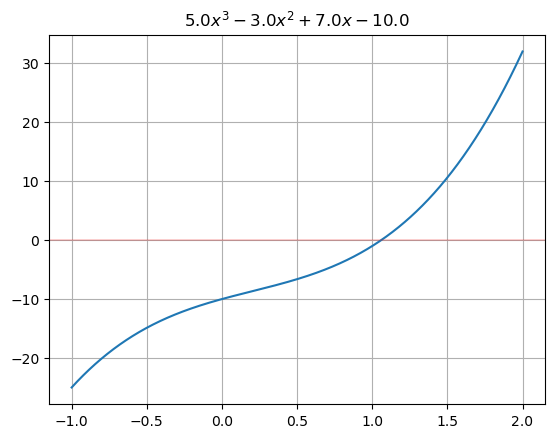

In [19]:
p9.plot(-1, 2)

In [20]:
dp9 = p9.differentiate()
print(dp9)

15.0 * x^2 - 6.0 * x + 7.0


In [21]:
p9.newton(0.5)

(1.0597580762092567, True, 4)

----

# Quartic - uni-variate

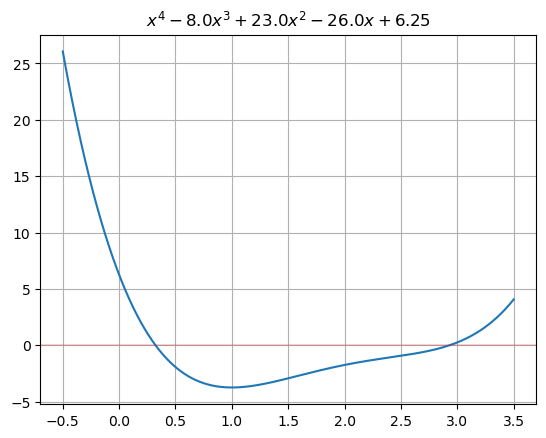

p13: x^4 - 8.0 * x^3 + 23.0 * x^2 - 26.0 * x + 6.25
derivative: 4.0 * x^3 - 24.0 * x^2 + 46.0 * x - 26.0
integral: 0.2 * x^5 - 2.0 * x^4 + 7.6667 * x^3 - 13.0 * x^2 + 6.25 * x


In [22]:
poly13 = decompose_polynomial("x^4-8*x^3+ 23*x^2 - 26*x + 6.25")
p13 = UniPoly(poly13)

# The lower_x, upper_x arguments can be tweaked to best display the interval of interest
# Default is -10, 10
p13.plot(-0.5, 3.5)
dp13 = p13.differentiate()
ip13 = p13.integrate()

print(f"p13: {p13}")
print(f"derivative: {dp13}")
print(f"integral: {ip13}")

----
&nbsp;
### Root finding with `newton()`

In [23]:
p13.newton(0.5)

(0.32246327598946956, True, 3)

In [24]:
p13.newton(3)

(2.9320716171852697, True, 2)

The other two roots are complex

----
&nbsp;
# `SymPy` integration

In [25]:
# uni-variate instance, the quartic defined above
p13.is_multivariate

False

In [26]:
# can use the display() method directly on a Polynomial instance for 'pretty' IPython printing
p13.display()

Poly(1.0*x**4 - 8.0*x**3 + 23.0*x**2 - 26.0*x + 6.25, x, domain='RR')

We'll save an instance in `SymPy` and cast the coefficients as rationals.
&nbsp;
This method *could* throw up some very interesting rational numbers. Hence, argument `rational` is default `False`.

In [27]:
# created a sympy object from our class instance with rational coefficients
symp13 = p13.save_as_sympy(rational=True)
print(f"symp13 is {type(symp13)}")

symp13 is <class 'sympy.polys.polytools.Poly'>


In [28]:
display(symp13)

Poly(x**4 - 8*x**3 + 23*x**2 - 26*x + 25/4, x, domain='QQ')

In [29]:
# integral
integral = sympy.Poly.integrate(symp13)
display(integral.args[0])

x**5/5 - 2*x**4 + 23*x**3/3 - 13*x**2 + 25*x/4

In [30]:
# Symbolic roots are not always returned
roots = symp13.all_roots()
roots

[CRootOf(4*x**4 - 32*x**3 + 92*x**2 - 104*x + 25, 0),
 CRootOf(4*x**4 - 32*x**3 + 92*x**2 - 104*x + 25, 1),
 CRootOf(4*x**4 - 32*x**3 + 92*x**2 - 104*x + 25, 2),
 CRootOf(4*x**4 - 32*x**3 + 92*x**2 - 104*x + 25, 3)]

In [31]:
# we can evaluate numerically,
for root in roots:
    print(root.evalf())

0.322472272991042
2.93203447945380
2.37274662377758 - 0.99011808307134*I
2.37274662377758 + 0.99011808307134*I


In [32]:
# Or access using nroots() method
symp13.nroots()

[0.322472272991042,
 2.93203447945380,
 2.37274662377758 - 0.99011808307134*I,
 2.37274662377758 + 0.99011808307134*I]

----
&nbsp;
### Floating point coefficients cast to rational

In [33]:
poly14 = decompose_polynomial("5.82456*x^4-8.12324*x^3+ 23.2233*x^2 - 26.3565*x + 6.25")
p14 = UniPoly(poly14)
p14.display()

Poly(5.82456*x**4 - 8.12324*x**3 + 23.2233*x**2 - 26.3565*x + 6.25, x, domain='RR')

In [34]:
symp14 = p14.save_as_sympy(rational=True)
display(symp14.args[0])

72807*x**4/12500 - 203081*x**3/25000 + 232233*x**2/10000 - 52713*x/2000 + 25/4

----
&nbsp;
## Multivariate instance in `SymPy`

In [35]:
p12.is_multivariate

True

In [36]:
p12.display()

Poly(5.0*x**3*y**2*z - 3.0*x**2*y*z**2 + 7.0*x*y*z - 10.0*z**2, x, y, z, domain='RR')

In [37]:
symp12 = p12.save_as_sympy(rational=True)
display(symp12.args[0])

5*x**3*y**2*z - 3*x**2*y*z**2 + 7*x*y*z - 10*z**2

We can calculate the first partial derivative with respect to x

In [38]:
# Need to declare symbolic variables
x, y, z = sympy.symbols('x y z')

# extract the first argument from the Poly class which is the expression
expr = symp12.args[0]

# first partial derivative with respect to x
partial_x = expr.diff(x)
display(sympy.expand(partial_x))

15*x**2*y**2*z - 6*x*y*z**2 + 7*y*z

In [39]:
# second partial derivative with respect to x
partial_x_two = expr.diff(x, x)
display(sympy.expand(partial_x_two))

30*x*y**2*z - 6*y*z**2

----

#### Creating a `sympy.Poly` class instance for our polynomial gives access to a range of symbolic methods.
[Sympy docs](https://docs.sympy.org/latest/index.html)

In [40]:
# Not all these methods are callable.
#print(dir(symp13))

----

# Cubic - uni-variate

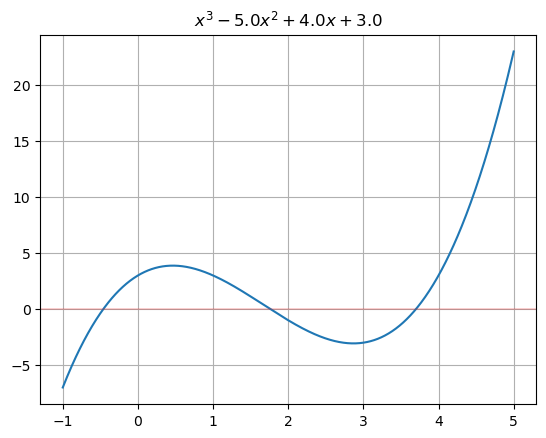

p15: x^3 - 5.0 * x^2 + 4.0 * x + 3.0
derivative: 3.0 * x^2 - 10.0 * x + 4.0
integral: 0.25 * x^4 - 1.6667 * x^3 + 2.0 * x^2 + 3.0 * x


In [41]:
poly15 = decompose_polynomial("x^3 - 5*x^2 + 4*x +3")
p15 = UniPoly(poly15)

p15.plot(-1, 5)
dp15 = p15.differentiate()
ip15 = p15.integrate()

print(f"p15: {p15}")
print(f"derivative: {dp15}")
print(f"integral: {ip15}")

In [42]:
# definite integral (lower bound, upper bound)
p15.integrate_definite(-1, 2)

3.749999999999999

In [43]:
p15.newton(-0.5)

(-0.4605056069250443, True, 2)

In [44]:
p15.newton(2)

(1.7608695652173914, True, 2)

In [45]:
p14.newton(3.5)

(0.9531653390632921, True, 7)

----

### An Example where starting points could enter an infinite cycle

p15: x^3 - 2.0 * x + 2.0


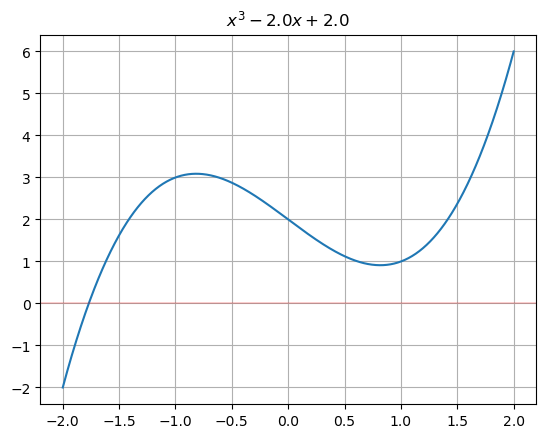

derivative: 3.0 * x^2 - 2.0


In [46]:
poly15 = decompose_polynomial("x^3 - 2*x +2")
p15 = UniPoly(poly15)

print(f"p15: {p15}")
p15.plot(-2, 2)
dp15 = p15.differentiate()
print(f"derivative: {dp15}")

Choosing $x=0$ or $x=1$ as starting points, Newton's method fails to converge even after 100 iterations

In [47]:
p15.newton(1, max_it=100)

(1.0, False, 100)

In [48]:
p15.newton(0, max_it=100)

(0.0, False, 100)

The graph of the function aids finding suitable starting points

In [49]:
p15.newton(-2)

(-1.769292662905941, True, 2)

In [50]:
p15.newton(0.5)

(-1.76929656115579, True, 7)

----